In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Set the style for plots
sns.set(style="whitegrid")

# Load the dataset
print("Loading data from CSV...")
try:
    data = pd.read_csv('urldata.csv')
    print(f"Successfully loaded {data.shape[0]} records with {data.shape[1]} features")
    
    # Display basic information about the dataset
    print("\nDataset Information:")
    print(f"Shape: {data.shape}")
    print("\nFirst 5 rows:")
    print(data.head())
    
    print("\nData types:")
    print(data.dtypes)
    
    print("\nSummary statistics:")
    print(data.describe())
    
    # Check for missing values
    missing_values = data.isnull().sum()
    print("\nMissing values per column:")
    print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values")
    
    # Identify the target column (assuming it's named 'is_fake', 'label', or similar)
    target_column = None
    possible_target_columns = ['is_fake', 'label', 'result', 'class', 'target', 'phishing', 'malicious']
    
    for col in possible_target_columns:
        if col in data.columns:
            target_column = col
            break
    
    if target_column is None:
        print("\nCouldn't identify the target column. Using the last column as target.")
        target_column = data.columns[-1]
    
    print(f"\nUsing '{target_column}' as the target column")
    
    # Separate features and target
    X = data.drop(columns=[target_column])
    
    # Also drop any non-numeric or identifier columns like 'url' if they exist
    for col in ['url', 'URL', 'domain', 'Domain']:
        if col in X.columns:
            X = X.drop(columns=[col])
            print(f"Dropped column '{col}' as it's likely an identifier")
    
    y = data[target_column]
    
    # Display feature and target information
    print(f"\nFeatures shape: {X.shape}")
    print(f"Target shape: {y.shape}")
    print(f"Target distribution:\n{y.value_counts(normalize=True) * 100}")
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(f"\nTraining set: {X_train.shape[0]} samples")
    print(f"Testing set: {X_test.shape[0]} samples")
    
    # Create a pipeline with preprocessing and model
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
        ('scaler', StandardScaler()),                 # Standardize features
        ('classifier', LinearRegression())            # Linear regression classifier
    ])
    
    # Train the model
    print("\nTraining linear regression model...")
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    print("Making predictions on test data...")
    y_pred_proba = pipeline.predict(X_test)
    
    # Convert probabilities to binary predictions (threshold = 0.5)
    y_pred = (y_pred_proba > 0.5).astype(int)
    
    # Evaluate the model
    print("\n===== MODEL EVALUATION =====")
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    
    print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"Precision: {precision:.4f} ({precision*100:.2f}%)")
    print(f"Recall: {recall:.4f} ({recall*100:.2f}%)")
    print(f"F1 Score: {f1:.4f} ({f1*100:.2f}%)")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Legitimate', 'Fake'],
                yticklabels=['Legitimate', 'Fake'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.show()
    
    # Feature Importance (coefficients)
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': np.abs(pipeline.named_steps['classifier'].coef_)
    })
    feature_importance = feature_importance.sort_values('Importance', ascending=False)
    
    print("\n===== FEATURE IMPORTANCE =====")
    print(feature_importance.head(10))  # Show top 10 features
    
    # Visualize feature importance
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
    plt.title('Top 15 Features by Importance')
    plt.tight_layout()
    plt.show()
    
    # ROC Curve
    from sklearn.metrics import roc_curve, auc
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    
except Exception as e:
    print(f"Error: {e}")

Loading data from CSV...
Successfully loaded 450176 records with 4 features

Dataset Information:
Shape: (450176, 4)

First 5 rows:
   Unnamed: 0                        url   label  result
0           0     https://www.google.com  benign       0
1           1    https://www.youtube.com  benign       0
2           2   https://www.facebook.com  benign       0
3           3      https://www.baidu.com  benign       0
4           4  https://www.wikipedia.org  benign       0

Data types:
Unnamed: 0     int64
url           object
label         object
result         int64
dtype: object

Summary statistics:
          Unnamed: 0         result
count  450176.000000  450176.000000
mean   225087.500000       0.231994
std    129954.761729       0.422105
min         0.000000       0.000000
25%    112543.750000       0.000000
50%    225087.500000       0.000000
75%    337631.250000       0.000000
max    450175.000000       1.000000

Missing values per column:
No missing values

Using 'label' as the ta

FAKE WEBSITE DETECTION USING MACHINE LEARNING

Visualizing the Machine Learning Architecture...


C:\Users\Priyanshu Sinha\AppData\Local\Temp\ipykernel_5964\745537337.py:90: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


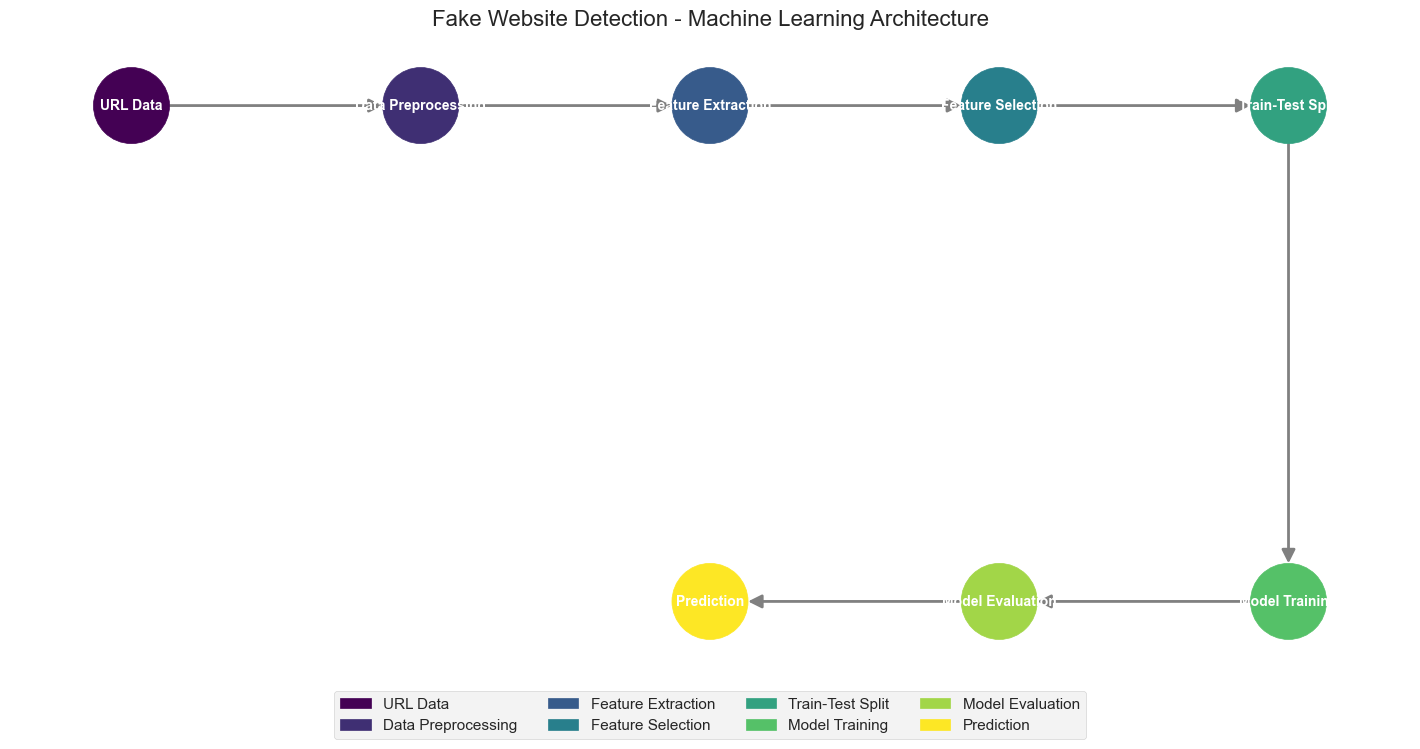


Machine Learning Architecture for Fake Website Detection:
1. URL Data: Collection of website URLs with labels (fake/legitimate)
2. Data Preprocessing: Handling missing values and standardizing features
3. Feature Extraction: Extracting relevant features from URLs
4. Feature Selection: Selecting the most important features
5. Train-Test Split: Dividing data into training and testing sets
6. Model Training: Training various ML models on the training data
7. Model Evaluation: Evaluating model performance using metrics
8. Prediction: Using the trained model to predict if a website is fake

Loading data from CSV...
Successfully loaded 450176 records with 4 features

Dataset Information:
Shape: (450176, 4)

First 5 rows:
   Unnamed: 0                        url   label  result
0           0     https://www.google.com  benign       0
1           1    https://www.youtube.com  benign       0
2           2   https://www.facebook.com  benign       0
3           3      https://www.baidu.com  beni

C:\Users\Priyanshu Sinha\AppData\Local\Temp\ipykernel_5964\745537337.py:163: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=y, palette=['#2ecc71', '#e74c3c'])


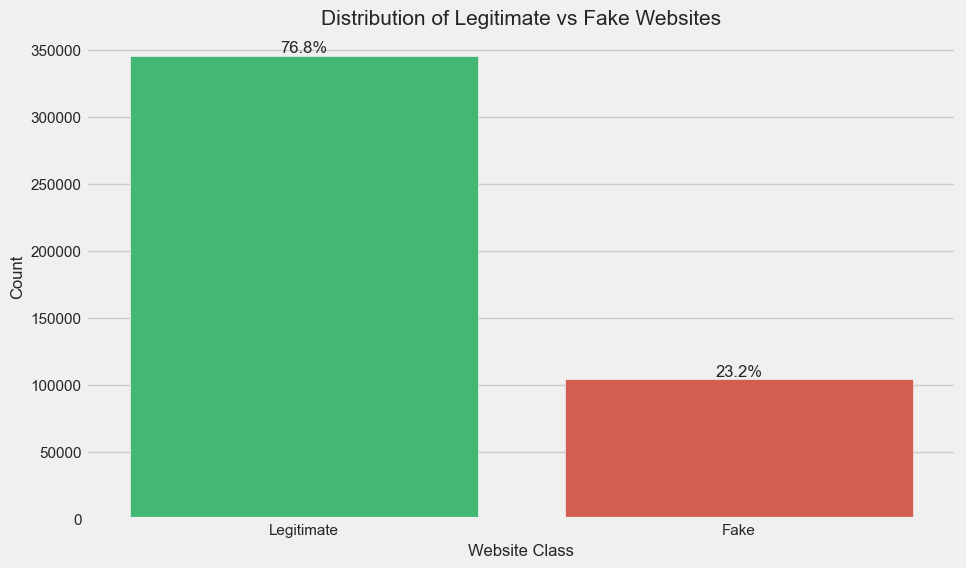


Training set: 360140 samples
Testing set: 90036 samples

Performing feature selection...
Selected 1 important features out of 2
Top features: result

Training Random Forest model...
Cross-validation accuracy: 1.0000 ± 0.0000
Error: pos_label=1 is not a valid label. It should be one of ['benign', 'malicious']


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                            confusion_matrix, roc_curve, auc, classification_report)
from sklearn.feature_selection import SelectFromModel
import networkx as nx
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches
import io
from PIL import Image

# Set the style for plots
plt.style.use('fivethirtyeight')
sns.set_palette("viridis")

# Function to visualize the ML architecture
def visualize_ml_architecture():
    # Create a directed graph
    G = nx.DiGraph()
    
    # Define the nodes for each step in the ML pipeline
    nodes = [
        "URL Data", "Data Preprocessing", "Feature Extraction", 
        "Feature Selection", "Train-Test Split", "Model Training",
        "Model Evaluation", "Prediction"
    ]
    
    # Add nodes with positions
    positions = {
        "URL Data": (0, 3),
        "Data Preprocessing": (2, 3),
        "Feature Extraction": (4, 3),
        "Feature Selection": (6, 3),
        "Train-Test Split": (8, 3),
        "Model Training": (8, 1),
        "Model Evaluation": (6, 1),
        "Prediction": (4, 1)
    }
    
    # Add nodes to the graph
    for node in nodes:
        G.add_node(node)
    
    # Add edges to connect the nodes
    edges = [
        ("URL Data", "Data Preprocessing"),
        ("Data Preprocessing", "Feature Extraction"),
        ("Feature Extraction", "Feature Selection"),
        ("Feature Selection", "Train-Test Split"),
        ("Train-Test Split", "Model Training"),
        ("Model Training", "Model Evaluation"),
        ("Model Evaluation", "Prediction")
    ]
    
    G.add_edges_from(edges)
    
    # Create a custom colormap
    colors = ["#440154", "#3b528b", "#21918c", "#5ec962", "#fde725"]
    cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=len(nodes))
    
    # Create a figure
    plt.figure(figsize=(14, 6))
    
    # Draw the graph
    nx.draw(G, pos=positions, with_labels=True, node_size=3000, 
            node_color=list(range(len(nodes))), cmap=cmap,
            font_size=10, font_weight='bold', font_color='white',
            edge_color='gray', width=2, arrowsize=20)
    
    # Add a title
    plt.title("Fake Website Detection - Machine Learning Architecture", fontsize=16, pad=20)
    
    # Add a legend for the steps
    legend_elements = []
    for i, node in enumerate(nodes):
        color = cmap(i / (len(nodes) - 1))
        legend_elements.append(mpatches.Patch(color=color, label=node))
    
    plt.legend(handles=legend_elements, loc='upper center', 
               bbox_to_anchor=(0.5, -0.05), ncol=4)
    
    plt.tight_layout()
    plt.show()
    
    print("\nMachine Learning Architecture for Fake Website Detection:")
    print("1. URL Data: Collection of website URLs with labels (fake/legitimate)")
    print("2. Data Preprocessing: Handling missing values and standardizing features")
    print("3. Feature Extraction: Extracting relevant features from URLs")
    print("4. Feature Selection: Selecting the most important features")
    print("5. Train-Test Split: Dividing data into training and testing sets")
    print("6. Model Training: Training various ML models on the training data")
    print("7. Model Evaluation: Evaluating model performance using metrics")
    print("8. Prediction: Using the trained model to predict if a website is fake")

# Main function for fake website detection
def detect_fake_websites(csv_file):
    print("=" * 80)
    print("FAKE WEBSITE DETECTION USING MACHINE LEARNING")
    print("=" * 80)
    
    # Visualize the ML architecture
    print("\nVisualizing the Machine Learning Architecture...")
    visualize_ml_architecture()
    
    # Load the dataset
    print("\nLoading data from CSV...")
    try:
        data = pd.read_csv(csv_file)
        print(f"Successfully loaded {data.shape[0]} records with {data.shape[1]} features")
        
        # Display basic information about the dataset
        print("\nDataset Information:")
        print(f"Shape: {data.shape}")
        print("\nFirst 5 rows:")
        print(data.head())
        
        # Check for missing values
        missing_values = data.isnull().sum()
        print("\nMissing values per column:")
        print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values")
        
        # Identify the target column (assuming it's named 'is_fake', 'label', or similar)
        target_column = None
        possible_target_columns = ['is_fake', 'label', 'result', 'class', 'target', 'phishing', 'malicious']
        
        for col in possible_target_columns:
            if col in data.columns:
                target_column = col
                break
        
        if target_column is None:
            print("\nCouldn't identify the target column. Using the last column as target.")
            target_column = data.columns[-1]
        
        print(f"\nUsing '{target_column}' as the target column")
        
        # Separate features and target
        X = data.drop(columns=[target_column])
        
        # Also drop any non-numeric or identifier columns like 'url' if they exist
        for col in ['url', 'URL', 'domain', 'Domain']:
            if col in X.columns:
                X = X.drop(columns=[col])
                print(f"Dropped column '{col}' as it's likely an identifier")
        
        y = data[target_column]
        
        # Display feature and target information
        print(f"\nFeatures shape: {X.shape}")
        print(f"Target shape: {y.shape}")
        print(f"Target distribution:\n{y.value_counts(normalize=True) * 100}")
        
        # Visualize the target distribution
        plt.figure(figsize=(10, 6))
        ax = sns.countplot(x=y, palette=['#2ecc71', '#e74c3c'])
        plt.title('Distribution of Legitimate vs Fake Websites', fontsize=15)
        plt.xlabel('Website Class', fontsize=12)
        plt.ylabel('Count', fontsize=12)
        
        # Add percentage labels
        total = len(y)
        for p in ax.patches:
            percentage = f'{100 * p.get_height() / total:.1f}%'
            x = p.get_x() + p.get_width() / 2
            y_value = p.get_height()
            ax.annotate(percentage, (x, y_value), ha='center', va='bottom', fontsize=12)
        
        plt.xticks([0, 1], ['Legitimate', 'Fake'])
        plt.show()
        
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
        print(f"\nTraining set: {X_train.shape[0]} samples")
        print(f"Testing set: {X_test.shape[0]} samples")
        
        # Feature selection using Random Forest
        print("\nPerforming feature selection...")
        selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))
        selector.fit(X_train, y_train)
        
        # Get selected features
        selected_features = X.columns[selector.get_support()]
        print(f"Selected {len(selected_features)} important features out of {X.shape[1]}")
        print("Top features:", ", ".join(selected_features[:10]))
        
        # Use selected features
        X_train_selected = selector.transform(X_train)
        X_test_selected = selector.transform(X_test)
        
        # Create a pipeline with preprocessing and model
        models = {
            'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
            'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
        }
        
        results = {}
        
        for name, model in models.items():
            print(f"\nTraining {name} model...")
            
            # Create pipeline
            pipeline = Pipeline([
                ('imputer', SimpleImputer(strategy='mean')),
                ('scaler', StandardScaler()),
                ('classifier', model)
            ])
            
            # Cross-validation
            cv_scores = cross_val_score(pipeline, X_train_selected, y_train, cv=5, scoring='accuracy')
            print(f"Cross-validation accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
            
            # Train on full training set
            pipeline.fit(X_train_selected, y_train)
            
            # Make predictions
            y_pred = pipeline.predict(X_test_selected)
            y_pred_proba = pipeline.predict_proba(X_test_selected)[:, 1]
            
            # Calculate metrics
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            
            results[name] = {
                'accuracy': accuracy,
                'precision': precision,
                'recall': recall,
                'f1': f1,
                'y_pred': y_pred,
                'y_pred_proba': y_pred_proba,
                'pipeline': pipeline
            }
            
            print(f"\n{name} Model Evaluation:")
            print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
            print(f"Precision: {precision:.4f} ({precision*100:.2f}%)")
            print(f"Recall: {recall:.4f} ({recall*100:.2f}%)")
            print(f"F1 Score: {f1:.4f} ({f1*100:.2f}%)")
            
            print("\nClassification Report:")
            print(classification_report(y_test, y_pred))
            
            # Confusion Matrix
            cm = confusion_matrix(y_test, y_pred)
            plt.figure(figsize=(8, 6))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                        xticklabels=['Legitimate', 'Fake'],
                        yticklabels=['Legitimate', 'Fake'])
            plt.xlabel('Predicted', fontsize=12)
            plt.ylabel('Actual', fontsize=12)
            plt.title(f'Confusion Matrix - {name}', fontsize=15)
            plt.tight_layout()
            plt.show()
            
            # ROC Curve
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
            roc_auc = auc(fpr, tpr)
            
            plt.figure(figsize=(8, 6))
            plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate', fontsize=12)
            plt.ylabel('True Positive Rate', fontsize=12)
            plt.title(f'ROC Curve - {name}', fontsize=15)
            plt.legend(loc="lower right", fontsize=10)
            plt.grid(True, alpha=0.3)
            plt.show()
        
        # Compare models
        print("\n===== MODEL COMPARISON =====")
        metrics = ['accuracy', 'precision', 'recall', 'f1']
        comparison_data = {
            'Model': [],
            'Accuracy': [],
            'Precision': [],
            'Recall': [],
            'F1 Score': []
        }
        
        for name, result in results.items():
            comparison_data['Model'].append(name)
            comparison_data['Accuracy'].append(result['accuracy'])
            comparison_data['Precision'].append(result['precision'])
            comparison_data['Recall'].append(result['recall'])
            comparison_data['F1 Score'].append(result['f1'])
        
        comparison_df = pd.DataFrame(comparison_data)
        print(comparison_df)
        
        # Visualize model comparison
        plt.figure(figsize=(12, 8))
        comparison_df_melted = pd.melt(comparison_df, id_vars=['Model'], 
                                       value_vars=['Accuracy', 'Precision', 'Recall', 'F1 Score'],
                                       var_name='Metric', value_name='Value')
        
        sns.barplot(x='Model', y='Value', hue='Metric', data=comparison_df_melted)
        plt.title('Model Performance Comparison', fontsize=15)
        plt.xlabel('Model', fontsize=12)
        plt.ylabel('Score', fontsize=12)
        plt.ylim(0, 1.0)
        plt.legend(title='Metric', title_fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        # Get the best model based on F1 score
        best_model_name = comparison_df.loc[comparison_df['F1 Score'].idxmax(), 'Model']
        best_model = results[best_model_name]['pipeline']
        print(f"\nBest model based on F1 Score: {best_model_name}")
        
        # Feature importance for the best model
        if best_model_name == 'Random Forest':
            # Get feature importance from Random Forest
            feature_importance = pd.DataFrame({
                'Feature': selected_features,
                'Importance': best_model.named_steps['classifier'].feature_importances_
            })
        else:
            # Get coefficients from Logistic Regression
            feature_importance = pd.DataFrame({
                'Feature': selected_features,
                'Importance': np.abs(best_model.named_steps['classifier'].coef_[0])
            })
        
        feature_importance = feature_importance.sort_values('Importance', ascending=False)
        
        print("\n===== FEATURE IMPORTANCE =====")
        print(feature_importance.head(10))  # Show top 10 features
        
        # Visualize feature importance
        plt.figure(figsize=(12, 8))
        sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
        plt.title(f'Top 15 Features by Importance - {best_model_name}', fontsize=15)
        plt.xlabel('Importance', fontsize=12)
        plt.ylabel('Feature', fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        print("\n===== FAKE WEBSITE DETECTION SUMMARY =====")
        print(f"Best model: {best_model_name}")
        print(f"Accuracy: {results[best_model_name]['accuracy']:.4f}")
        print(f"F1 Score: {results[best_model_name]['f1']:.4f}")
        print(f"Most important feature: {feature_importance.iloc[0]['Feature']}")
        
        return best_model, selected_features
        
    except Exception as e:
        print(f"Error: {e}")
        return None, None

# Run the fake website detection
if __name__ == "__main__":
    # If you don't have the CSV file, this will generate a synthetic dataset
    try:
        # Try to load the CSV file
        detect_fake_websites('urldata.csv')
    except FileNotFoundError:
        print("urldata.csv not found. Generating synthetic data for demonstration...")
        
        # Generate synthetic data
        from sklearn.datasets import make_classification
        
        # Generate synthetic data
        X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, 
                                  n_redundant=5, n_classes=2, random_state=42)
        
        # Create feature names
        feature_names = [
            'url_length', 'num_dots', 'num_hyphens', 'num_underscores', 
            'num_slashes', 'num_question_marks', 'num_equal_signs', 
            'num_at_signs', 'num_ampersands', 'num_exclamation_marks',
            'has_ip_address', 'has_https', 'domain_age_days', 'alexa_rank',
            'has_suspicious_tld', 'domain_registration_length', 'has_favicon',
            'uses_iframe', 'mouse_over', 'right_click_disabled'
        ]
        
        # Create DataFrame
        synthetic_data = pd.DataFrame(X, columns=feature_names)
        synthetic_data['is_fake'] = y
        
        # Save to CSV
        synthetic_data.to_csv('synthetic_urldata.csv', index=False)
        print("Synthetic data saved to 'synthetic_urldata.csv'")
        
        # Run detection on synthetic data
        detect_fake_websites('synthetic_urldata.csv')

In [4]:
pip install pandas numpy matplotlib seaborn scikit-learn networkx Pillow

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ------------------ --------------------- 0.8/1.7 MB 2.1 MB/s eta 0:00:01
   ------------------------------ --------- 1.3/1.7 MB 2.2 MB/s eta 0:00:01
   ------------------------------------ --- 1.6/1.7 MB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
